In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('adidas_sales.csv')
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


In [23]:
df.head(5)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [24]:
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [25]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Month'] = df['Invoice Date'].dt.to_period('M')  
df['Total Sales'] = (
    df['Total Sales']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)
df['Operating Profit'] = (
    df['Operating Profit']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)
df['Units Sold'] = (
    df['Units Sold']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)
df['Price per Unit'] = (
    df['Price per Unit']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
    .astype(float)
)
df['Operating Margin'] = (
    df['Operating Margin']
    .astype(str)
    .str.replace('%', '', regex=False)
    .str.strip()
    .astype(float) / 100
)

df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,0.50,In-store,2020-01
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,0.30,In-store,2020-01
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,0.35,In-store,2020-01
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,0.35,In-store,2020-01
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,0.30,In-store,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64.0,3200.0,896.0,0.28,Outlet,2021-01
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105.0,4305.0,1378.0,0.32,Outlet,2021-01
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184.0,7544.0,2791.0,0.37,Outlet,2021-02
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70.0,2940.0,1235.0,0.42,Outlet,2021-02


In [26]:
total_sales = df['Total Sales'].sum()
total_profit = df['Operating Profit'].sum()
total_units = df['Units Sold'].sum()
avg_price = df['Price per Unit'].mean()
avg_margin = df['Operating Margin'].mean() * 100

print(f"Total Sales: ${total_sales:,.0f}")
print(f"Operating Profit: ${total_profit:,.0f}")
print(f"Units Sold: {total_units:,.0f}")
print(f"Average Price per Unit: ${avg_price:.2f}")
print(f"Average Operating Margin: {avg_margin:.2f}%")

Total Sales: $899,902,125
Operating Profit: $332,135,122
Units Sold: 2,478,861
Average Price per Unit: $45.22
Average Operating Margin: 42.30%


In [33]:
monthly_sales = df.groupby('Month')['Total Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales

,Month,Total Sales
0,2020-01,16253746.0
1,2020-02,14997988.0
2,2020-03,17660577.0
3,2020-04,24607006.0
4,2020-05,16918014.0
5,2020-06,8829819.0
6,2020-07,17146013.0
7,2020-08,19877980.0
8,2020-09,18304436.0
9,2020-10,10836269.0


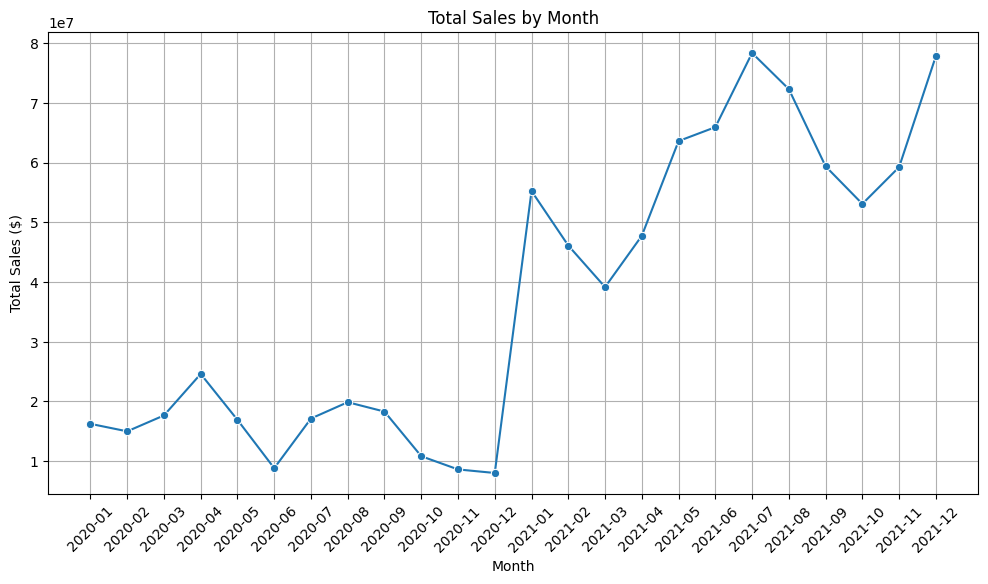

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Sales', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [40]:
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
region_pct = (region_sales / total_sales) * 100
region_sales

Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64

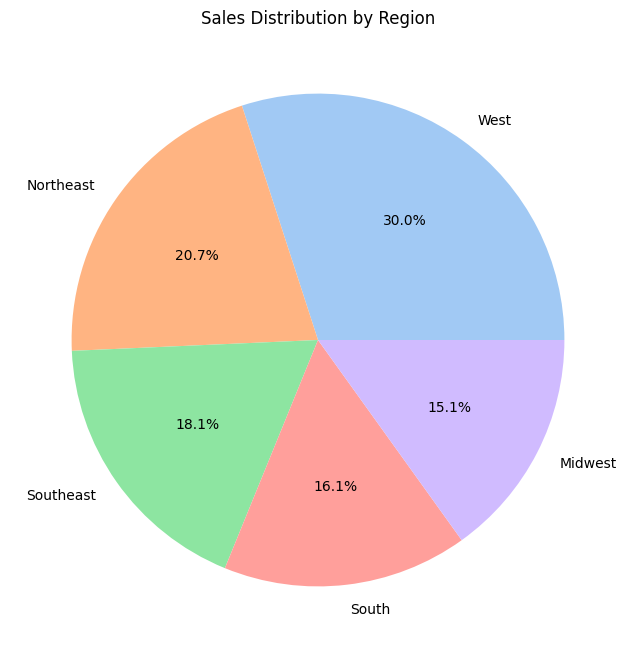

In [41]:
plt.figure(figsize=(8, 8))
region_sales.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Region')
plt.ylabel('')
plt.show()

In [31]:
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(6)
product_sales

Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_40568\1225085629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')


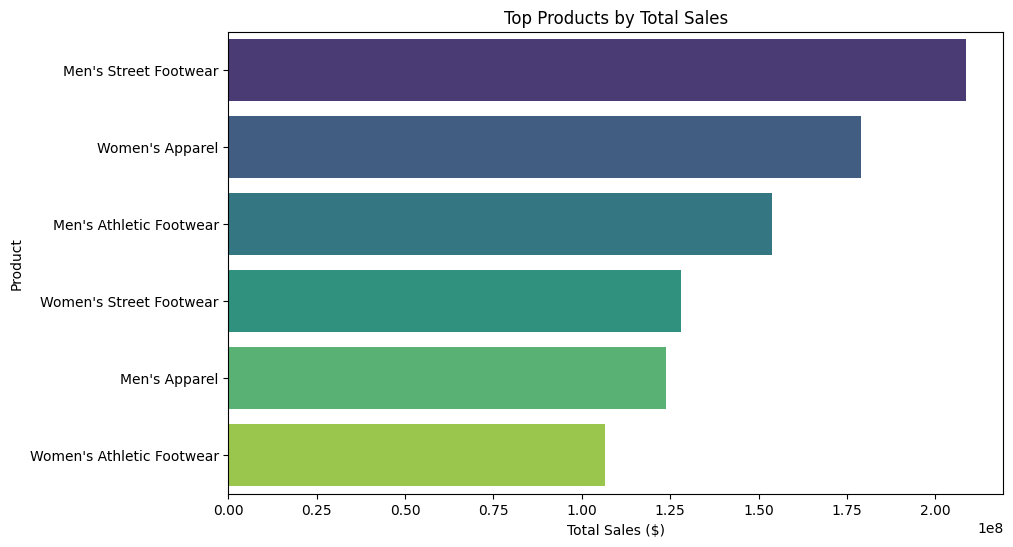

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis')
plt.title('Top Products by Total Sales')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product')
plt.show()

In [34]:
retailer_sales = df.groupby('Retailer')['Total Sales'].sum().sort_values(ascending=False)
retailer_sales

Retailer
West Gear        242964333.0
Foot Locker      220094720.0
Sports Direct    182470997.0
Kohl's           102114753.0
Amazon            77698912.0
Walmart           74558410.0
Name: Total Sales, dtype: float64

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_40568\1933169120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retailer_sales.values, y=retailer_sales.index, palette='Blues_d')


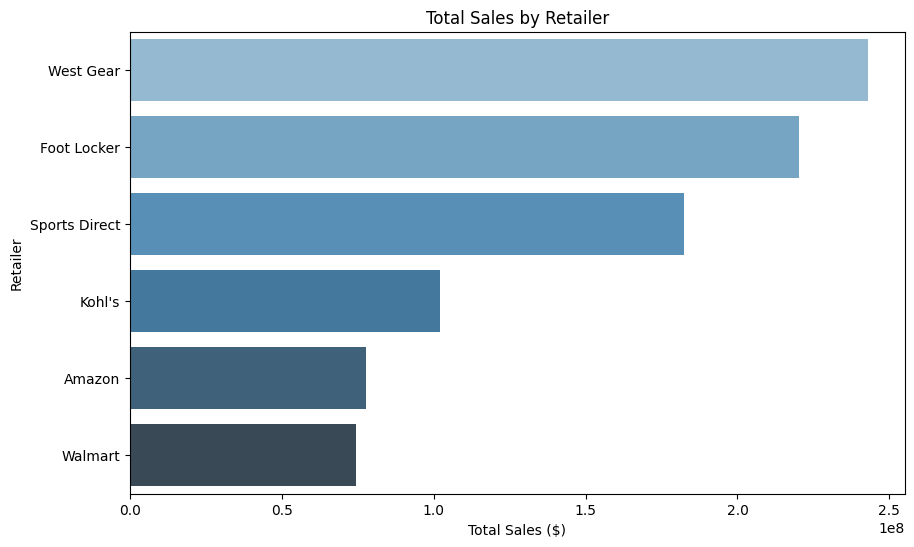

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x=retailer_sales.values, y=retailer_sales.index, palette='Blues_d')
plt.title('Total Sales by Retailer')
plt.xlabel('Total Sales ($)')
plt.ylabel('Retailer')
plt.show()

In [37]:
method_sales = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)
method_sales

Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: float64

In [38]:
print("Sales by Method:")
print(method_sales)

Sales by Method:
Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: float64


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_40568\3835141592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_sales.index, y=method_sales.values, palette='Set2')


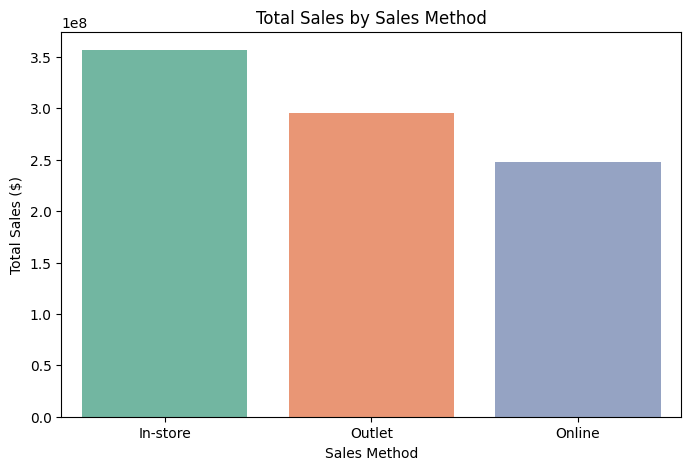

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(x=method_sales.index, y=method_sales.values, palette='Set2')
plt.title('Total Sales by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Total Sales ($)')
plt.show()